# <center>Machine Learning Lab: Exercise Sheet 5</center>
<center> <b>Submitted By: Mohit Bansal</b></center>
<center> <b>Student ID: 279314</b></center>

You are required to pre-process given datasets:
+ **Classification**: Bank Marketing: (use bank.csv) https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
+ **Regression**: Wine Quality : http://archive.ics.uci.edu/ml/datasets/Wine+Quality

## Load the data using pandas

### Bank Marketing - Data is in .csv format and we can directly load it

In [103]:
# Import Libraries
%pylab inline
import os
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import math
from numpy import random

np.seterr(all='raise')
path = '/Users/mundanemohit/Google Drive/My Work/MSc. Data Analytics/WiSe 18/3113 Machine Learning Lab/Excercises/Ex4'
os.chdir(path)

# Read Datasets
bankDF = pd.read_csv('./bank/bank.csv', sep = ';')
print("Bank Marketing:", bankDF.shape[0], "Rows x", bankDF.shape[1], "Columns")
bankDF.head()

Populating the interactive namespace from numpy and matplotlib
Bank Marketing: 4521 Rows x 17 Columns


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [8]:
path = '/Users/mundanemohit/Google Drive/My Work/MSc. Data Analytics/WiSe 18/3113 Machine Learning Lab/Excercises/Ex3'
os.chdir(path)

# Read Datasets
redwineDF = pd.read_csv('winequality-red.csv', sep = ';')
whitewineDF = pd.read_csv('winequality-white.csv', sep = ';')

redwineDF.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Exercise 0: Data Preprocessing

### 0.1: First, let's remove all rows with NA values

In [9]:
# Remove rows with NA values
def remove_na(df):
    print("Removing rows with NA...")
    print("Before: ", df.shape)
    df = df.dropna()
    print("After: ", df.shape)
    return df

bankDF = remove_na(bankDF)
redwineDF = remove_na(redwineDF)
whitewineDF = remove_na(whitewineDF)

Removing rows with NA...
Before:  (4521, 17)
After:  (4521, 17)
Removing rows with NA...
Before:  (1599, 12)
After:  (1599, 12)
Removing rows with NA...
Before:  (4898, 12)
After:  (4898, 12)


### 0.2a: Next, we will convert all binary variables to 0 & 1

In [10]:
# Find binary columns from categorical columns

for col in bankDF.select_dtypes(include=['category', 'object']).columns:
    print(col, ":", bankDF[col].unique())

job : ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
marital : ['married' 'single' 'divorced']
education : ['primary' 'secondary' 'tertiary' 'unknown']
default : ['no' 'yes']
housing : ['no' 'yes']
loan : ['no' 'yes']
contact : ['cellular' 'unknown' 'telephone']
month : ['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
poutcome : ['unknown' 'failure' 'other' 'success']
y : ['no' 'yes']


In [11]:
# Convert binary to 0 & 1
for col in ['default', 'housing', 'loan', 'y']:
    bankDF[col] = bankDF[col].map(dict(yes=1, no=0))
    
bankDF.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0


### 0.2b: Rest of the categorical variables will be one-hot encoded

In [12]:
bankDF = pd.get_dummies(bankDF)
bankDF.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,1787,0,0,19,79,1,-1,0,...,0,0,0,0,1,0,0,0,0,1
1,33,0,4789,1,1,11,220,1,339,4,...,0,0,1,0,0,0,1,0,0,0
2,35,0,1350,1,0,16,185,1,330,1,...,0,0,0,0,0,0,1,0,0,0
3,30,0,1476,1,1,3,199,4,-1,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,0,1,0,5,226,1,-1,0,...,0,0,1,0,0,0,0,0,0,1


Now our dataset has 49 columns instead of the 17 we started with.

### 0.3: Normalize numeric columns

Next, to ensure that the sigmoid function does not overflow/ underflow due to large $\hat{y}$ values, we will use min-max normalization to bring all columns between the range of [0,1] 

In [13]:
# Normalize numeric columns
for col in ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']:
    bankDF[col] = (bankDF[col] -bankDF[col].min())/(bankDF[col].max() - bankDF[col].min())
    
bankDF.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.161765,0,0.068455,0,0,0.600000,0.024826,0.000000,0.000000,0.00,...,0,0,0,0,1,0,0,0,0,1
1,0.205882,0,0.108750,1,1,0.333333,0.071500,0.000000,0.389908,0.16,...,0,0,1,0,0,0,1,0,0,0
2,0.235294,0,0.062590,1,0,0.500000,0.059914,0.000000,0.379587,0.04,...,0,0,0,0,0,0,1,0,0,0
3,0.161765,0,0.064281,1,1,0.066667,0.064548,0.061224,0.000000,0.00,...,1,0,0,0,0,0,0,0,0,1
4,0.588235,0,0.044469,1,0,0.133333,0.073486,0.000000,0.000000,0.00,...,0,0,1,0,0,0,0,0,0,1


In [14]:
# Normalize numeric columns for wine datasets
for col in redwineDF.columns:
    redwineDF[col] = (redwineDF[col] -redwineDF[col].min())/(redwineDF[col].max() - redwineDF[col].min())
    whitewineDF[col] = (whitewineDF[col] -whitewineDF[col].min())/(whitewineDF[col].max() - whitewineDF[col].min())

whitewineDF.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032,0.5
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935,0.5
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710,0.5
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.5
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.5


### 0.4: Finally, we will split the dataset into train & test

In [15]:
# Add bias column
bankDF["bias"], redwineDF["bias"], whitewineDF["bias"] = 1,1,1

# Divide data into test & train sets
bankDF_train= bankDF.sample(frac=0.8,random_state=200)
bankDF_test = bankDF.drop(bankDF_train.index)
print("Bank Dataset ----> Train Set:", len(bankDF_train), "    Test Set: ", len(bankDF_test))

# Divide data into test & train sets
redwineDF_train= redwineDF.sample(frac=0.8,random_state=200)
redwineDF_test = redwineDF.drop(redwineDF_train.index)
print("Red Wine Dataset ----> Train Set:", len(redwineDF_train), "    Test Set: ", len(redwineDF_test))

# Add bias column
whitewineDF["bias"] = 1

# Divide data into test & train sets
whitewineDF_train= whitewineDF.sample(frac=0.8,random_state=200)
whitewineDF_test = whitewineDF.drop(whitewineDF_train.index)

print("White Wine Dataset ----> Train Set:", len(whitewineDF_train), "    Test Set: ", len(whitewineDF_test))

Bank Dataset ----> Train Set: 3617     Test Set:  904
Red Wine Dataset ----> Train Set: 1279     Test Set:  320
White Wine Dataset ----> Train Set: 3918     Test Set:  980


# Exercise 1: Regularization 

You have to implement Ridge Regression using mini-Batch Gradient Descent (mini-BGD) algorithm. Now your SGD algorithm will have three hyperparameters:
    1. Learning rate (stepsize) α
    2. Regularization constant λ and 
    3. Number of mini Batches batchsize

Implement $Ridge Regression$ using $mini-BGD$ algorithm:
+ You are free to use any algorithm for selecting learning rate i.e. ($AdaGrad$, $Bold-Driver$ or fixed stepsize)
+ Pick three values of $α_0$ and $λ$, these values should be picked from relatively small to large. You should keep a fixed batchsize = 50.
+ Train you model for each combination of the picked values of α and λ, and for each training epoch (an epoch is equal to going over all mini-batches once) record RMSE on training and test data.
+ For each combination of $α_0$ and λ, plot $RMSE_{train}$ and $RMSE_{test}$ per iteration. [**Hint:** you can plot $RMSE_{train}$ on positive axis and $RMSE_{test}$ on negative axis of same plot].


The ridge-regression algorithm is as follows:

+ Initialize α, β, λ, $h$
+ For each iteration $i$:
+ Shuffle dataset 
+ Get $K$ batches
+ For each batch $k = [1, 2, 3.... K]$:
    - $\delta{L_k}$ = $X^T_k (y_k - \hat{y_k})$
    - $h = h + diag$($\delta{L_{k}}$.$\delta{L^T_{k}}$)
    - $momentum$ = $\frac{α}{\sqrt{h}}$
    - $β_{new}$ = $β_{old}$ + $momentum$ . ($X^T_k(y_k - \hat{y_k})$ - 2$λβ_{old}$)
+ Calculate $LogLoss$ on Train & Test sets

Where $λ$ is the regularization parameter, $h$ is ada-grad history

## Helper functions

### Sigmoid & Loss Functions:

In [52]:
# Define sigmoid function to predict y for logistic regression
def sigmoid(X_k, beta):
    y_n = np.dot(beta, X_k.T)
    p = 1 / (1 + np.exp(-y_n))
    return p

# Define predict function for linear regression
def predict(X, beta):
    return np.matmul(X, beta.T)

# Define logloss function
def logloss(y, p):
    L = np.abs(- y * np.log(p).T) - ((1 - y) * np.log(1 - p).T)
    return  L[0,0] #/ len(y.T)
    
# Define RMSE loss function
def RMSE_loss(y, yhat):
    L = np.sqrt((np.sum(np.square(y - yhat), axis = 0)) / len(y)) 
    return  L[0,0]

# Store historical logloss values
def epoch_loss(X, y, beta):
    y_hat = sigmoid(X, beta).T
    L = logloss(y, y_hat)
    return L

### Ada-grad and mini-batch Functions:

In [17]:
# Define adagrad function for step-length control
def adagradupdate(h, dfx):
    dfx = np.matrix(dfx)
    return h + np.diag(dfx * dfx.T)

# Create mini-batches from the dataset
def get_mini_batches(X, y, batchSize):
    X = np.matrix(X)
    y = np.matrix(y)
    random_idxs = random.choice(len(y), len(y), replace=False)
    X_shuffled = X[random_idxs,:]
    y_shuffled = y[random_idxs]
    mini_batches = [(X_shuffled[i:i+batchSize,:], y_shuffled[i:i+batchSize]) for i in range(0, len(y), batchSize)]
    return mini_batches

### Batch Gradient Descent function - Logistic Regression

In [22]:
def learn_BGD_logreg(X, y, Xtest, ytest, iterations = 100, alpha = 0.1, reg_parm = 0.1, batchSize = 50):
    
    # Initialize betas & adagrad history
    beta = np.matrix([0.1] * X.shape[1])
    h = np.matrix([1] * X.shape[1])
    
    # Calculate initial y hat on train & test sets (for graphs)
    logL_train, logL_test= [], []
    logL_train.append(epoch_loss(X, y, beta))
    logL_test.append(epoch_loss(Xtest, ytest, beta))
            
    for iter in range(iterations):      
        mb = get_mini_batches(X, y, batchSize)
        for m in mb:
            X_k = m[0]
            y_k = m[1]
            
            # Calculate y hat & gradient
            y_hat_k = sigmoid(X_k, beta).T
            dfx = X_k.T * (y_k - y_hat_k) 
            h = adagradupdate(h, dfx)               # Update history for adagrad
            
            # Update betas
            momentum = alpha/np.sqrt(h)
            beta = beta + (np.array(momentum) * np.array(dfx.T - 2 * reg_parm * beta))                 
        ### End of inner loop

        try:
            # Calculate log-loss error on train and test sets
            logL_train.append(epoch_loss(X, y, beta))
            logL_test.append(epoch_loss(Xtest, ytest, beta))
        except:
            print("Function diverged after iteration #", iter)
            break          
        
    return logL_train, logL_test

### Batch Gradient Descent function - Linear Regression

In [48]:
def learn_BGD_linreg(X, y, Xtest, ytest, iterations = 100, alpha = 0.1, reg_parm = 0.1, batchSize = 50):
    
    # Initialize betas & adagrad history
    beta = np.matrix([0.1] * X.shape[1])
    h = np.matrix([1] * X.shape[1])
    
    # Calculate initial y hat on train & test sets (for graphs)
    RMSE_train, RMSE_test = [], []
    ytrain_hat = predict(X, beta)
    RMSE_train.append(RMSE_loss(y, ytrain_hat))
    ytest_hat = predict(Xtest, beta)
    RMSE_test.append(RMSE_loss(ytest, ytest_hat))
            
    for iter in range(iterations):      
        mb = get_mini_batches(X, y, batchSize)
        for m in mb:
            X_k = m[0]
            y_k = m[1]
            
            # Calculate y hat & gradient
            y_hat_k = predict(X_k, beta)
            dfx = - 2 * X_k.T * (y_k - y_hat_k) 
            h = adagradupdate(h, dfx)              # Update history for adagrad
            
            # Update betas
            momentum = alpha/np.sqrt(h)
            beta = beta - (np.array(momentum) * np.array(dfx.T - 2 * reg_parm * beta))                      
        ### End of inner loop

        try:
            # Calculate log-loss error on train and test sets
            ytrain_hat = predict(X, beta)
            RMSE_train.append(RMSE_loss(y, ytrain_hat))
            ytest_hat = predict(Xtest, beta)
            RMSE_test.append(RMSE_loss(ytest, ytest_hat))
        except:
            print("Function diverged after iteration #", iter)
            break          
        
    return RMSE_train, RMSE_test

### Now, we will test our Mini-Batch SGD logistic regression on Bank Dataset with the following combinations of learning rate and regularization parameter:

$$
^a/_{λ}\left(\begin{array}{cc} 
0.001, 0.001 & 0.001, 0.1 & 0.001, 1\\
0.1, 0.001 & 0.1, 0.1 & 0.1, 1\\
1, 0.001 & 1, 0.1 & 1, 1
\end{array}\right)
$$ 

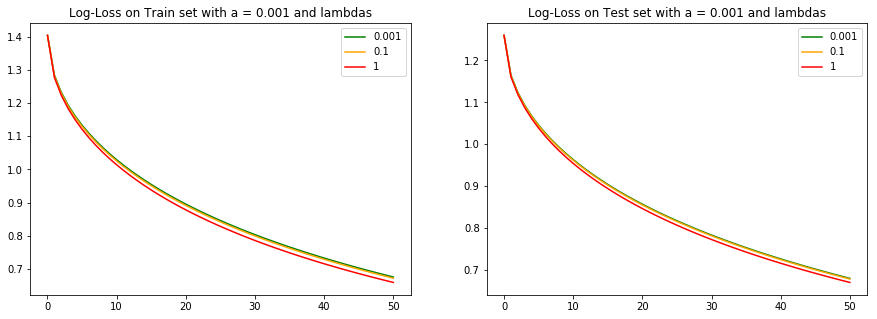

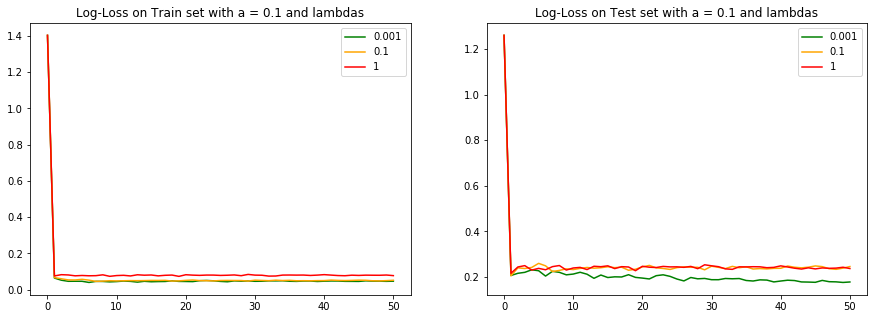

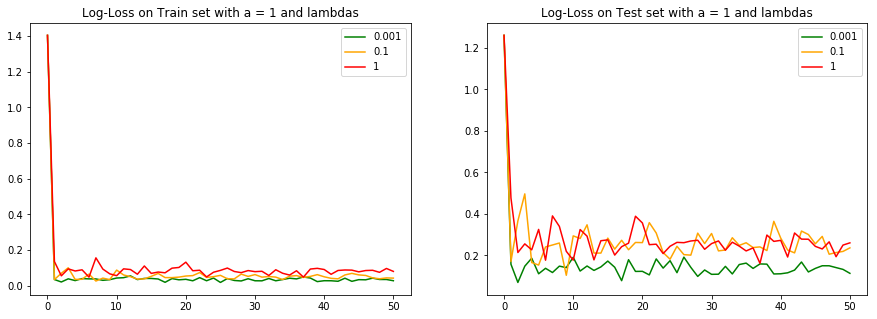

In [49]:
X = bankDF_train.loc[:, bankDF_train.columns != 'y']
y = np.matrix(bankDF_train['y']).T
Xtest = bankDF_test.loc[:, bankDF_test.columns != 'y']
ytest = np.matrix(bankDF_test['y']).T

alpha = [0.001, 0.1, 1]
lamb = [0.001, 0.1, 1]
color = ['green', 'orange', 'red']


for a in alpha:
    fig = plt.figure(figsize=(15, 5))
    i = 0
    fig.add_subplot(1,2,1)
    for l in lamb:
        logL_train[i], logL_test[i] = learn_BGD_logreg(X, y, Xtest, ytest, 
                                                       alpha = a, reg_parm = l, 
                                                       iterations=50)
        plt.title("Log-Loss on Train set with a = {} and lambdas".format(a))
        plt.plot(logL_train[i], color = color[i%3])
        plt.legend(lamb)
        i = i+1
    fig.add_subplot(1,2,2)
    i = 0
    for l in lamb:
        plt.title("Log-Loss on Test set with a = {} and lambdas".format(a))
        plt.plot(logL_test[i], color = color[i%3])
        i = i+1
        plt.legend(lamb)
    plt.show()

We took learning rate values from very small to very high, and plotted graphs with various regularization penalties. A pattern that can be seen from the graphs is that when our learning rate is very small, a higher regularization factor can help us reach better results (graph 1 & 2)

However, when we have an optimum learning rate, a high regularization penalty can lead to a higher loss value due to faster convergence.

### To see if we get similar results, let's test our BGD - linear regression algorithm on Red Wine Dataset with the following combinations:

$$
^a/_{λ}\left(\begin{array}{cc} 
0.0001, 0.001 & 0.0001, 0.1 & 0.0001, 1\\
0.01, 0.001 & 0.01, 0.1 & 0.01, 1\\
0.1, 0.001 & 0.1, 0.1 & 0.1, 1
\end{array}\right)
$$ 


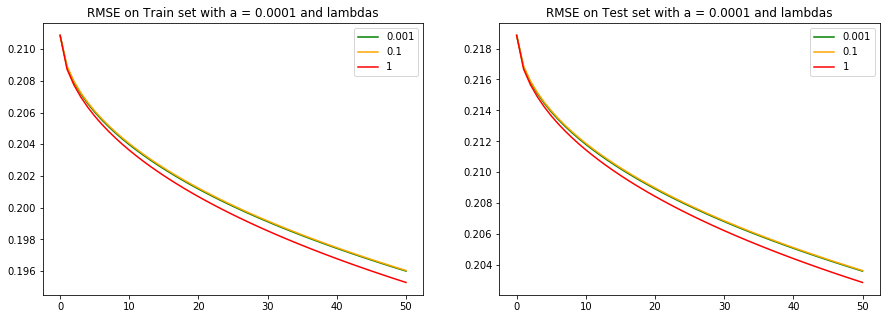

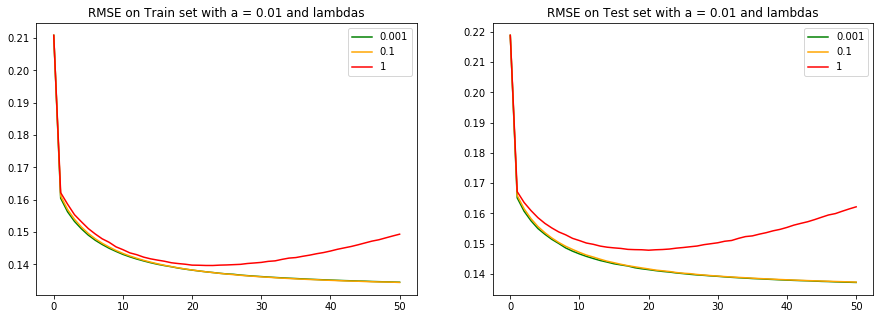

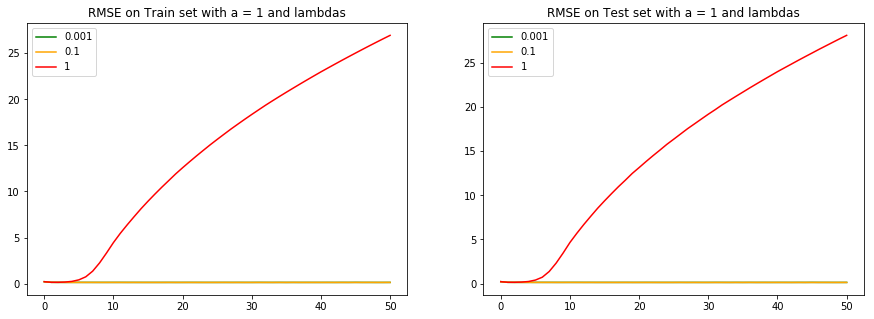

In [158]:
X = redwineDF_train.loc[:, redwineDF_train.columns != 'quality']
y = np.matrix(redwineDF_train['quality']).T
Xtest = redwineDF_test.loc[:, redwineDF_test.columns != 'quality']
ytest = np.matrix(redwineDF_test['quality']).T

alpha = [0.0001, 0.01, 1]
lamb = [0.001, 0.1, 1]
color = ['green', 'orange', 'red']

for a in alpha:
    fig = plt.figure(figsize=(15, 5))
    i = 0
    fig.add_subplot(1,2,1)
    for l in lamb:
        RMSE_train[i], RMSE_test[i] = learn_BGD_linreg(X, y, Xtest, ytest, 
                                                       alpha = a, reg_parm = l, 
                                                       iterations=50)
        plt.title("RMSE on Train set with a = {} and lambdas".format(a))
        plt.plot(RMSE_train[i], color = color[i%3])
        plt.legend(lamb)
        i = i+1
    fig.add_subplot(1,2,2)
    i = 0
    for l in lamb:
        plt.title("RMSE on Test set with a = {} and lambdas".format(a))
        plt.plot(RMSE_test[i], color = color[i%3])
        i = i+1
        plt.legend(lamb)
    plt.show()

On the Red Wine dataset, the results are much clearer. We can see that due to high regularization terms, the function diverges in Graphs 4,5,6 & 7. Therefore, it is very important to pick the right penalty term for regularization.


# Exercise 2: Hyper-parameter tuning and Cross validation

You will implement grid search with k-fold cross-validation for model selection i.e. choosing best hyperparameters.

+ Pick a range of $α_0$ and $λ$ defined on grid. You can choose fixed batchsize = 50.
+ Implement **k-fold cross-validation** protocol for **grid search**. For each combination of $α_0$ and $λ$ you will perform k-fold cross-validation. let **k = 5** in this case.
+ Keep track of mean performance (i.e. RMSE value) across k−folds for each set of hyperparameters. Plot on the grid $α_0$ vs $λ$ the RMSE score for all combinations. [Hint: you can use a 3D plot with axes= $α_0,λ, RMSE$]
+ Finally, for the optimal value of $a_0$ and $λ$, train your model on complete training data and evaluate on test data.
+ Plot $RMSE_{train}$ and $RMSE_{test}$ per iteration. [Hint: you can plot $RMSE_{train}$ on positive axis and $RMSE_{test}$ on negative axis of same plot]. Compare your result with results in previous plots



### K-Fold cross-validation algorithm:

+ Split training data in k sets
+ For each $α_0,λ$ combination:
    + For $k = [0,1...k-1]$:
        + Set Validation set to set k
        + Other sets are now training sets
        + Train model for 1 iteration
        + Compute RMSE on validation set
    + Compute Mean RMSE across 5 iterations

### K-Fold function to get training and validation sets

In [63]:
def get_kfolds(df, k):
    # Get test set
    DF_test = df[k]
    X_test, y_test = DF_test[0], DF_test[1]
    
    # Get train set
    DF_train = df[:k] + df[k+1:]
    X_train = np.concatenate((DF_train[0][0],
                              DF_train[1][0],
                              DF_train[2][0],
                              DF_train[3][0]), axis = 0)
    y_train = np.concatenate((DF_train[0][1],
                              DF_train[1][1],
                              DF_train[2][1],
                              DF_train[3][1]), axis = 0)
    return X_train, y_train, X_test, y_test

## Testing on the Redwine dataset

In [141]:
X = redwineDF_train.loc[:, redwineDF_train.columns != 'quality']
y = np.matrix(redwineDF_train['quality']).T
Xtest = redwineDF_test.loc[:, redwineDF_test.columns != 'quality']
ytest = np.matrix(redwineDF_test['quality']).T


alpha = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
lamb =  [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
folds = 5
ksize = round(len(X)/folds)
a_arr, l_arr, perf_mat = [], [], []

for a in alpha:
    for l in lamb:
        #print("Trying: ", a,l)
        # We will reuse the minibatch function to create 5 folds from the training set
        DFfolds = get_mini_batches(X, y, ksize)
        
        logL_val = []
        for k in range(folds):
            Xtr, ytr, Xval, yval = get_kfolds(DFfolds, k)
            LT, LV = learn_BGD_linreg(Xtr, ytr, Xval, yval, 
                                                       alpha = a, reg_parm = l, 
                                                       iterations=1)
            logL_val.append(LV)   
        a_arr.append(a)
        l_arr.append(l)
        perf_mat.append(np.mean(logL_val))

## Visualization of Grid-Search vs. RMSE error

/Users/mundanemohit/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


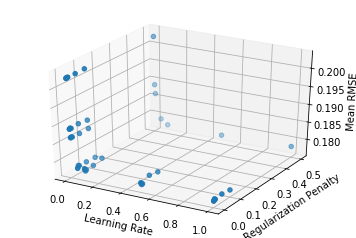

In [142]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(a_arr, l_arr, perf_mat, zdir='z')
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Regularization Penalty')
ax.set_zlabel('Mean RMSE')
Fig.show()

In [159]:
best = np.min(perf_mat)
idx = perf_mat.index(best)
a = a_arr[idx]
l = l_arr[idx]
print("Best performance was achieved with alpha: ", a, " and Penalty: ", l)

Best performance was achieved with alpha:  1  and Penalty:  0.001


## Testing the model with optimal parameters on Wine Dataset

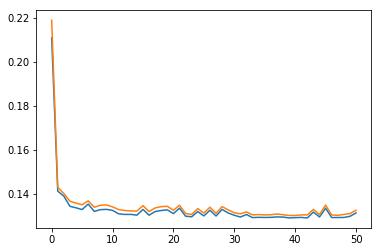

In [154]:

RMSE_train, RMSE_test = learn_BGD_linreg(X, y, Xtest, ytest, 
                                            alpha = a, reg_parm = l, 
                                            iterations=50)

plt.title()
plt.plot(RMSE_train)
plt.plot(RMSE_test)
plt.show()

Compared to the previous plots, a much better result is obtained here in terms of RMSE. Also, since grid search picked the highest possible value of alpha, we could also run grid-search by expanding the range further.